## Imports and Installs

In [1]:
import pandas as pd
import numpy as np
import io
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Data Aquisition


In [81]:
df1 = pd.read_csv('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/train.tsv', sep='\t',names=['text','l','id'])
df2 = pd.read_csv('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/dev.tsv', sep='\t',names=['text','l','id'])
df3 = pd.read_csv('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/test.tsv', sep='\t',names=['text','l','id'])

df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)
df = df.drop(columns=['id'])

In [82]:
df

,text,l
0,My favourite food is anything I didn't have to...,27
1,"Now if he does off himself, everyone will thin...",27
2,WHY THE FUCK IS BAYLESS ISOING,2
3,To make her feel threatened,14
4,Dirty Southern Wankers,3
...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,15
54259,Well that makes sense.,4
54260,Daddy issues [NAME],27
54261,So glad I discovered that subreddit a couple m...,0


In [83]:
df.shape

(54263, 2)

In [84]:
df['l'].nunique()

782

In [85]:
classifieds = [0,0,1,1,8,2,10,4,4,5,6,6,6,0,7,8,9,11,2,7,3,12,3,3,10,10,0,13]

x = pd.Series() 

def lis(x):
    return x.split(",")

x=df['l'].apply(lis)

def dataP(a):
    l= np.zeros((14,), dtype=int)
    for i,v in enumerate(a):
        l[classifieds[int(v)]] = 1
    return l

x=x.apply(dataP)

C:\Users\bibas\AppData\Local\Temp\ipykernel_7712\2058537554.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series()


In [86]:
classes = [0,0,1,1,8,2,10,4,4,5,6,6,6,0,7,8,9,11,2,7,3,12,3,3,10,10,0,13]


def dataP(a):
    l=a.split(",")
    for i,v in enumerate(l):
        l[i]=classes[int(v)]
    return ','.join(map(str, l))

df['l']=df['l'].apply(dataP)


In [87]:
df

,text,l
0,My favourite food is anything I didn't have to...,13
1,"Now if he does off himself, everyone will thin...",13
2,WHY THE FUCK IS BAYLESS ISOING,1
3,To make her feel threatened,7
4,Dirty Southern Wankers,1
...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,8
54259,Well that makes sense.,8
54260,Daddy issues [NAME],13
54261,So glad I discovered that subreddit a couple m...,0


In [89]:
class_names= ["admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion", "curiosity", "desire","disappointment", "disapproval", 
               "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief", "joy", "love", "nervousness", "optimism", "pride", "realization",
               "relief", "remorse"," sadness", "surprise", "neutral"]

count= np.zeros((14,), dtype=int)

for i,q in enumerate(x):
    for j,p in enumerate(q):
        if p == 1:
            count[j] +=1

for i in range(14):
    print(i,"-",class_names[i], " = ", count[i])

0 - admiration  =  10066
1 - amusement  =  4705
2 - anger  =  3899
3 - annoyance  =  3498
4 - approval  =  3508
5 - caring  =  1583
6 - confusion  =  3907
7 - curiosity  =  929
8 - desire  =  6986
9 - disappointment  =  96
10 - disapproval  =  3884
11 - disgust  =  1785
12 - embarrassment  =  142
13 - excitement  =  17772


In [72]:
df['l'][11]

'0,8'

In [73]:
type(df['l'][7][0])


str

## Analysis and Visualization of dataset

In [90]:
print(df.shape)
print(df.isnull().sum())

(54263, 2)
text    0
l       0
dtype: int64


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54263 entries, 0 to 54262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54263 non-null  object
 1   l       54263 non-null  object
dtypes: object(2)
memory usage: 848.0+ KB


In [92]:
df.describe()

,text,l
count,54263,54263
unique,53994,426
top,Thank you.,13
freq,15,16021


In [93]:
value_counts = df['l'].value_counts()
value_counts

13          16021
0            6951
8            4745
1            3074
6            2690
            ...  
1,7,10          1
0,10,4,8        1
6,6,13          1
0,5,2           1
10,11,3         1
Name: l, Length: 426, dtype: int64

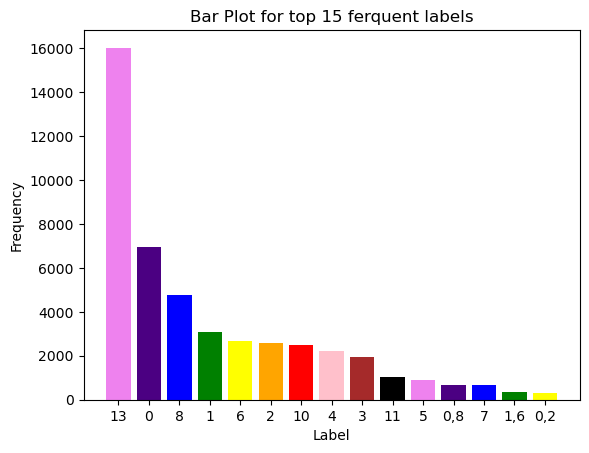

In [94]:
value_counts = df['l'].value_counts().head(15)
plt.bar(value_counts.index, value_counts.values, color=['violet', 'indigo', 'blue', 'green', 'yellow', 'orange' ,'red', 'pink','brown','black'])

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Bar Plot for top 15 ferquent labels')

plt.show()

## Data Pre-processing

In [95]:
df['text']=df['text'].str.lower()

In [96]:
df

,text,l
0,my favourite food is anything i didn't have to...,13
1,"now if he does off himself, everyone will thin...",13
2,why the fuck is bayless isoing,1
3,to make her feel threatened,7
4,dirty southern wankers,1
...,...,...
54258,thanks. i was diagnosed with bp 1 after the ho...,8
54259,well that makes sense.,8
54260,daddy issues [name],13
54261,so glad i discovered that subreddit a couple m...,0


In [97]:
def remove_url(txt):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', txt)


In [98]:
df['text']=df['text'].apply(remove_url)

In [99]:
exclude=string.punctuation
def remove_punc(txt):
    return txt.translate(str.maketrans('','',exclude))

In [100]:
df['text']=df['text'].apply(remove_punc)

In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bibas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
def remove_stop(txt):
    new=[]
    for w in txt.split():
        if w in stopwords.words('english'):
            new.append('')
        else:
            new.append(w)
    x=new[:]
    new.clear()
    return " ".join(x)

In [103]:
df['text']=df['text'].apply(remove_stop) 

In [104]:
df

,text,l
0,favourite food anything didnt cook,13
1,everyone think hes laugh screwing pe...,13
2,fuck bayless isoing,1
3,make feel threatened,7
4,dirty southern wankers,1
...,...,...
54258,thanks diagnosed bp 1 hospitalization well,8
54259,well makes sense,8
54260,daddy issues name,13
54261,glad discovered subreddit couple months ag...,0


In [106]:
def demoji(txt):
    return emoji.demojize(txt)


In [107]:
df['text']=df['text'].apply(demoji) 


In [108]:
ps=PorterStemmer()
def stem(txt):
    return " ".join([ps.stem(word) for word in txt.split()])

df['text']=df['text'].apply(stem)

In [109]:
df.head(10)

,text,l
0,favourit food anyth didnt cook,13
1,everyon think he laugh screw peopl instead act...,13
2,fuck bayless iso,1
3,make feel threaten,7
4,dirti southern wanker,1
5,omg peyton isnt good enough help us playoff du...,0
6,ye heard abt f bomb thank repli hubbi anxious ...,8
7,need board creat bit space name we’ll good,"4,3"
8,damn youtub outrag drama super lucr reddit,0
9,might link trust factor friend,13


## Exp. 1 - Model comparison


### Naive Bayes

In [124]:
x=df['text']
y=df['l']

In [125]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print ('\n the total number of Training Data :',y_train.shape)
print ('\n the total number of Test Data :',y_test.shape)



 the total number of Training Data : (32557,)

 the total number of Test Data : (21706,)


In [127]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=30)

In [128]:
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
print ('\n the total number of Training Data :',X_train_transformed.shape)
print ('\n the total number of Test Data :',X_test_transformed.shape)


 the total number of Training Data : (32557, 30)

 the total number of Test Data : (21706, 30)


In [129]:
clf = MultinomialNB()

In [130]:
clf.fit(X_train_transformed, y_train)

MultinomialNB()

In [131]:
y_pred = clf.predict(X_test_transformed)

In [132]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.37538007924076294


In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')
classes = np.unique(y_test)
report = classification_report(y_test, y_pred, labels=classes)

recall = recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

f1 = f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

print("Classification report:\n", report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.19      0.27      2713
         0,0       0.00      0.00      0.00       104
       0,0,0       0.00      0.00      0.00         3
      0,0,11       0.00      0.00      0.00         6
      0,0,13       0.00      0.00      0.00         1
       0,0,2       0.00      0.00      0.00         2
       0,0,3       0.00      0.00      0.00         4
       0,0,5       0.00      0.00      0.00         1
       0,0,8       0.00      0.00      0.00         3
         0,1       0.00      0.00      0.00        38
       0,1,1       0.00      0.00      0.00         1
    0,1,2,11       0.00      0.00      0.00         1
       0,1,3       0.00      0.00      0.00         1
       0,1,6       0.00      0.00      0.00         2
       0,1,8       0.00      0.00      0.00         1
        0,10       0.00      0.00      0.00        40
     0,10,11       0.00      0.00      0.00         1
   

### Support Vector Machine (SVM)

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [150]:
x = df['text']
y=df['l']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print ('\n the total number of Training Data :',y_train.shape)
print ('\n the total number of Test Data :',y_test.shape)


 the total number of Training Data : (32557,)

 the total number of Test Data : (21706,)


In [152]:
vectorizer = TfidfVectorizer(max_features=30)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [153]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [154]:
y_pred = clf.predict(X_test)

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4929051875057588


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')
classes = np.unique(y_test)
report = classification_report(y_test, y_pred, labels=classes)

recall = recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

f1 = f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

print("Classification report:\n", report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

Classification report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60      2713
         0,0       0.00      0.00      0.00       104
       0,0,0       0.00      0.00      0.00         3
      0,0,11       0.00      0.00      0.00         6
      0,0,13       0.00      0.00      0.00         1
       0,0,2       0.00      0.00      0.00         2
       0,0,3       0.00      0.00      0.00         4
       0,0,5       0.00      0.00      0.00         1
       0,0,8       0.00      0.00      0.00         3
         0,1       0.00      0.00      0.00        38
       0,1,1       0.00      0.00      0.00         1
    0,1,2,11       0.00      0.00      0.00         1
       0,1,3       0.00      0.00      0.00         1
       0,1,6       0.00      0.00      0.00         2
       0,1,8       0.00      0.00      0.00         1
        0,10       0.00      0.00      0.00        40
     0,10,11       0.00      0.00      0.00         1
   

In [156]:
type(y_test[0])

str

In [157]:
type(y_pred[0])

str

## Exp 2 - N-gram

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [160]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [161]:
cv = CountVectorizer(ngram_range=(1,2))
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [162]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [163]:
y_pred = clf.predict(X_test)

In [164]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4707454160140053


In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')
classes = np.unique(y_test)
report = classification_report(y_test, y_pred, labels=classes)

recall = recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

f1 = f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

print("Classification report:\n", report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.52      0.68      0.59      1372
         0,0       0.00      0.00      0.00        47
       0,0,0       0.00      0.00      0.00         2
      0,0,11       0.00      0.00      0.00         2
      0,0,13       0.00      0.00      0.00         1
       0,0,2       0.00      0.00      0.00         1
       0,0,3       0.00      0.00      0.00         2
       0,0,5       0.00      0.00      0.00         1
       0,0,8       0.00      0.00      0.00         2
         0,1       0.00      0.00      0.00        21
       0,1,1       0.00      0.00      0.00         1
    0,1,2,11       0.00      0.00      0.00         1
       0,1,8       0.00      0.00      0.00         1
        0,10       0.00      0.00      0.00        18
     0,10,11       0.00      0.00      0.00         1
   0,10,4,11       0.00      0.00      0.00         1
    0,10,4,8       0.00      0.00      0.00         1
   

C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## Exp 3 - Max Features

In [79]:
x=df['text']
y=df['l']

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print ('\n the total number of Training Data :',y_train.shape)
print ('\n the total number of Test Data :',y_test.shape)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
print ('\n the total number of Training Data :',X_train_transformed.shape)
print ('\n the total number of Test Data :',X_test_transformed.shape)

clf = MultinomialNB()

clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')
classes = np.unique(y_test)
report = classification_report(y_test, y_pred, labels=classes)

recall = recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')

f1 = f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')




 the total number of Training Data : (43410,)

 the total number of Test Data : (10853,)

 the total number of Training Data : (43410, 10)

 the total number of Test Data : (10853, 10)
Accuracy: 0.33603611904542524


C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bibas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

In [63]:
print("Classification report:\n", report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Classification report:
               precision    recall  f1-score   support

           0       0.28      0.08      0.12      1372
         0,0       0.00      0.00      0.00        47
       0,0,0       0.00      0.00      0.00         2
      0,0,11       0.00      0.00      0.00         2
      0,0,13       0.00      0.00      0.00         1
       0,0,2       0.00      0.00      0.00         1
       0,0,3       0.00      0.00      0.00         2
       0,0,5       0.00      0.00      0.00         1
       0,0,8       0.00      0.00      0.00         2
         0,1       0.00      0.00      0.00        21
       0,1,1       0.00      0.00      0.00         1
    0,1,2,11       0.00      0.00      0.00         1
       0,1,8       0.00      0.00      0.00         1
        0,10       0.00      0.00      0.00        18
     0,10,11       0.00      0.00      0.00         1
   0,10,4,11       0.00      0.00      0.00         1
    0,10,4,8       0.00      0.00      0.00         1
   

## Exp 4 - train-test splitting

In [31]:
x = df['text']
y=df['l']

In [32]:
def test(X_train, X_test, y_train, y_test):
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

In [37]:
per = [0.1, 0.2, 0.3]
for i in per:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=42)
    print ('\nThe total number of Training Data :',y_train.shape)
    print ('The total number of Test Data :',y_test.shape)
    test(X_train, X_test, y_train, y_test)


 the total number of Training Data : (48836,)

 the total number of Test Data : (5427,)
Accuracy: 0.5034088815183343

 the total number of Training Data : (43410,)

 the total number of Test Data : (10853,)
Accuracy: 0.4945176448908136

 the total number of Training Data : (37984,)

 the total number of Test Data : (16279,)
Accuracy: 0.49431783279071195
